# Fuzzy Detection

Using fuzzy detection to detect zones of different texture in an image. >> 
From: https://towardsdatascience.com/image-processing-with-python-working-with-entropy-b05e9c84fc36

Importing necessary packages

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imshow, imsave
from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import feature
from skimage import filters
from math import sqrt
from skimage import segmentation
from myfuncs import funcs

In [43]:
'''
def comparer(img1, img2, title1='Image 1', title2='Image 2'):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,14), dpi=200)
    ax1.set_title(title1)
    ax1.imshow(img1)
    ax2.set_title(title2)
    ax2.imshow(img2)
'''

"\ndef comparer(img1, img2, title1='Image 1', title2='Image 2'):\n    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,14), dpi=200)\n    ax1.set_title(title1)\n    ax1.imshow(img1)\n    ax2.set_title(title2)\n    ax2.imshow(img2)\n"

Importing image

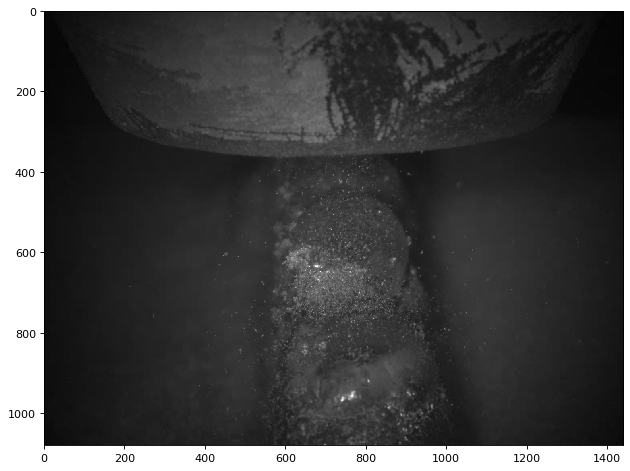

In [44]:
trail = imread('Images/Inputs/Set1/20240816-161944712534-0002.png')
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(trail)

convert to grayscale

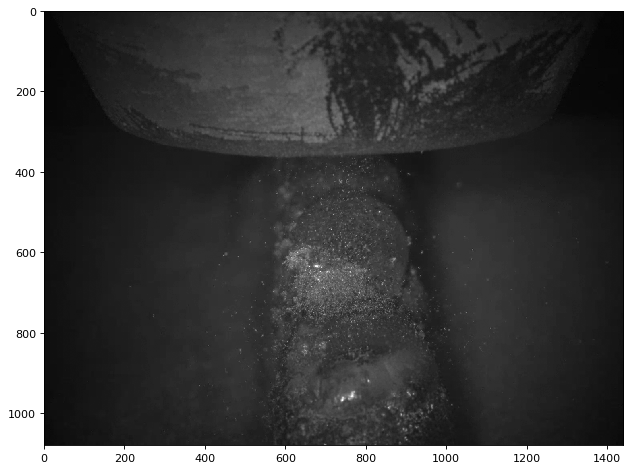

In [45]:
trail_gray = rgb2gray(imread('Images/Inputs/Set1/20240816-161944712534-0002.png'))
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(trail_gray);

Apply Entropy function

/Users/sid/opt/anaconda3/envs/3dpmd/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3577: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/sid/opt/anaconda3/envs/3dpmd/lib/python3.12/site-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


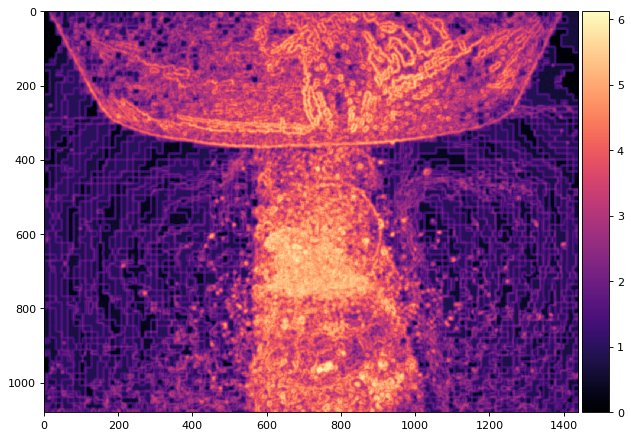

In [46]:
entropy_image = entropy(trail_gray, disk(5))
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(entropy_image, cmap = 'magma');

Function to show different kinds of entropy values for an image

In [47]:
'''def disk_iterations(image):
    image_gray = rgb2gray(image)
    f_size = 20
    radi = list(range(1,10))
    fig, ax = plt.subplots(3,3,figsize=(15,15))
    for n, ax in enumerate(ax.flatten()):
        ax.set_title(f'Radius at {radi[n]}', fontsize = f_size)
        ax.imshow(entropy(image_gray, disk(radi[n])), cmap = 
                  'magma');
        ax.set_axis_off()
    fig.tight_layout()'''

"def disk_iterations(image):\n    image_gray = rgb2gray(image)\n    f_size = 20\n    radi = list(range(1,10))\n    fig, ax = plt.subplots(3,3,figsize=(15,15))\n    for n, ax in enumerate(ax.flatten()):\n        ax.set_title(f'Radius at {radi[n]}', fontsize = f_size)\n        ax.imshow(entropy(image_gray, disk(radi[n])), cmap = \n                  'magma');\n        ax.set_axis_off()\n    fig.tight_layout()"

/var/folders/7g/v0vfsyyx33jb34b519lc7pyr0000gn/T/ipykernel_11888/3781023899.py:1: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  funcs.disk_iterations(trail)


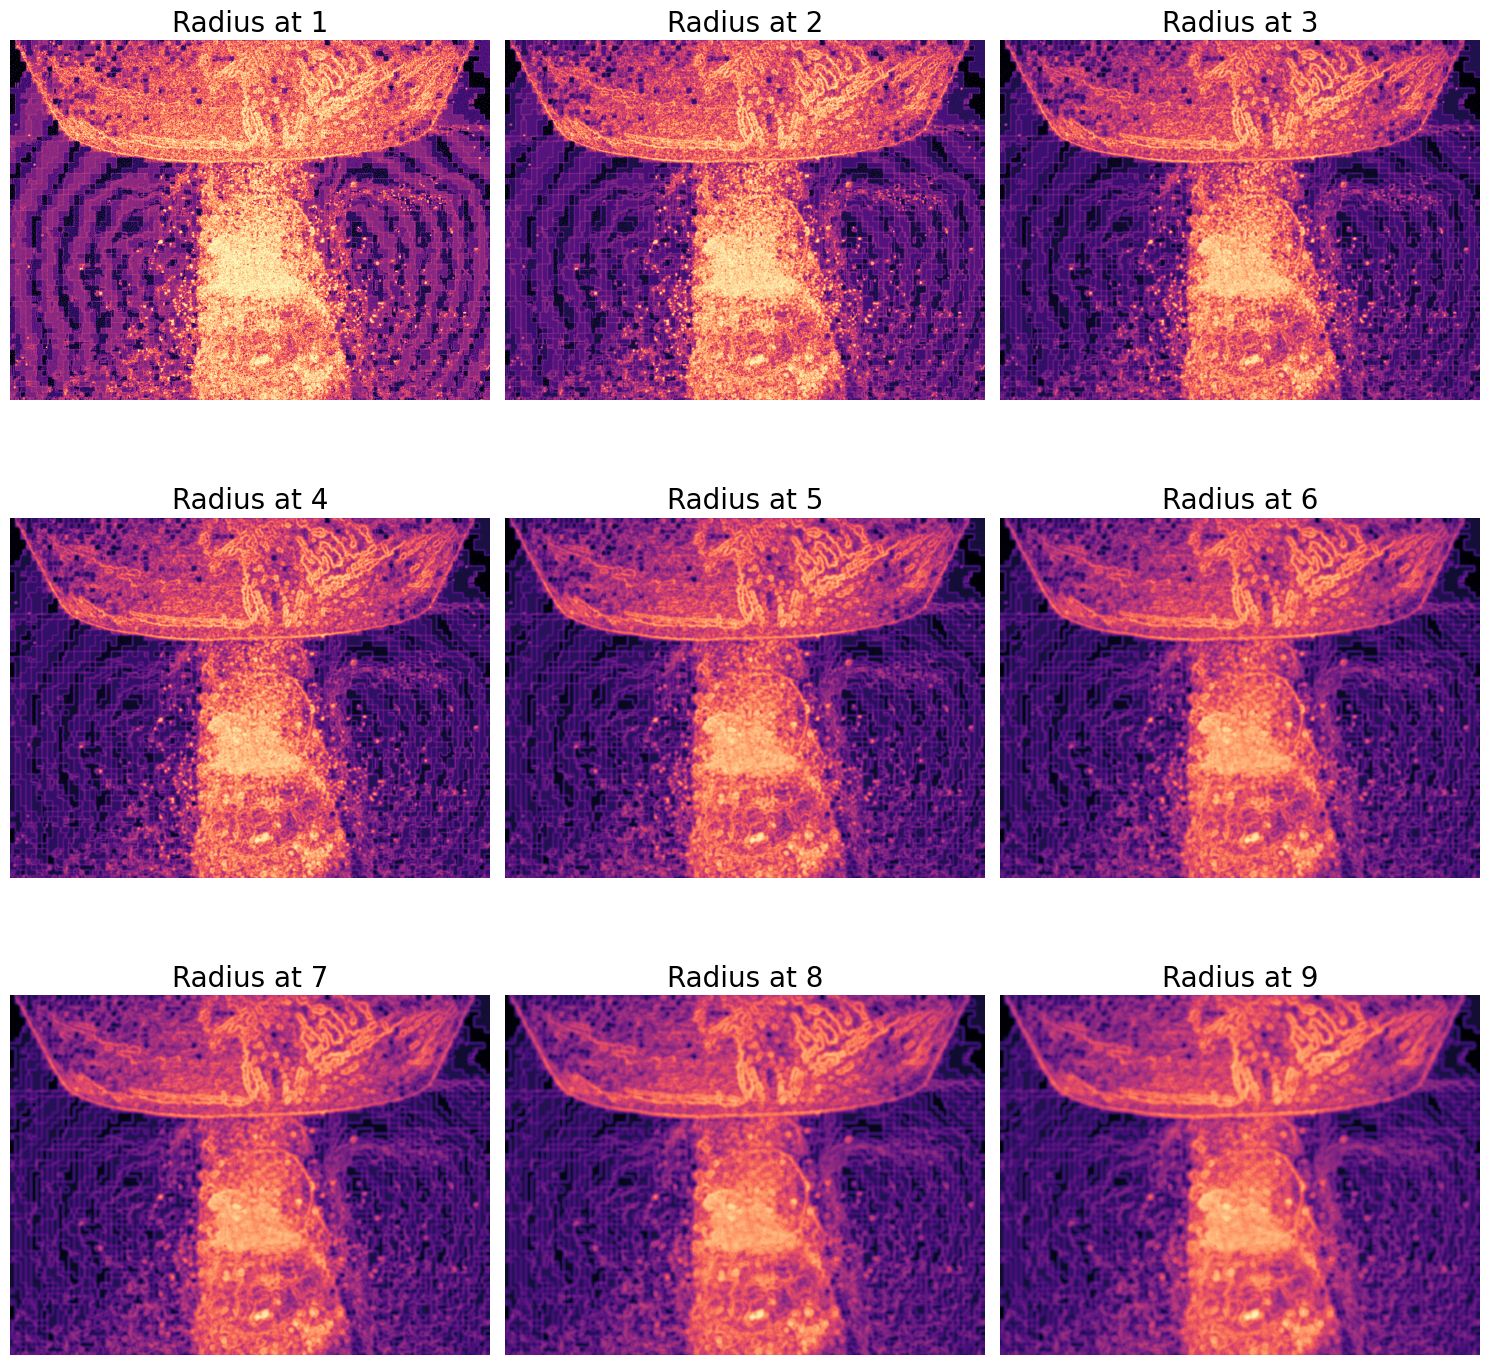

In [48]:
funcs.disk_iterations(trail)

Now we choose an entropy radius value that gives a good enough contrast without being too blurry. In this case 5-7 look good

Next we choose a threshold radius to create a mask. First we observe the outputs of different threshold values:

/var/folders/7g/v0vfsyyx33jb34b519lc7pyr0000gn/T/ipykernel_11888/1167955461.py:1: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  funcs.threshold_checker(trail, entropy_val=7)


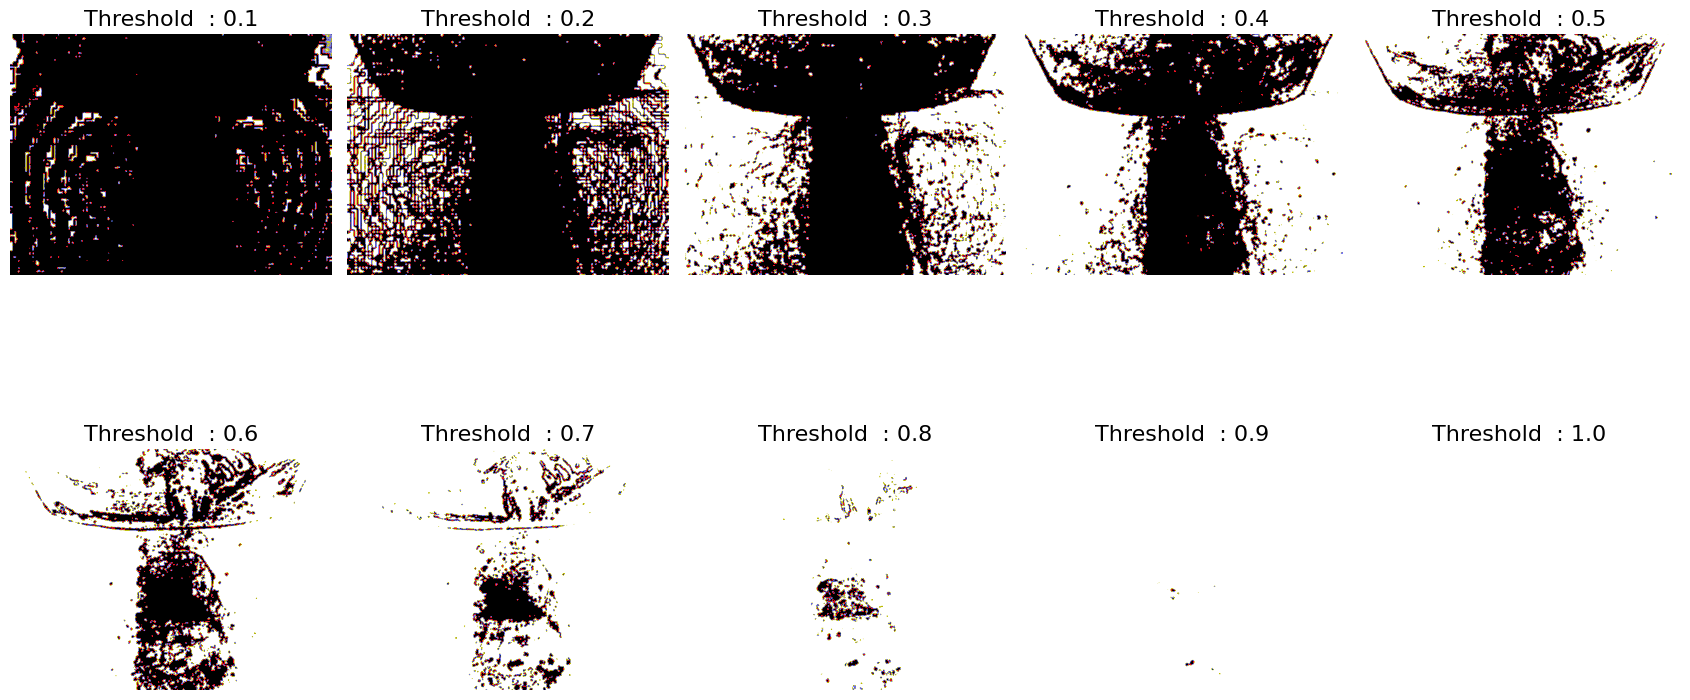

In [53]:
funcs.threshold_checker(trail, entropy_val=7)

Threshold = 0.5 looks the best here. Next we detect edges in the thresholded image using the canny edge detector.

## Finding Canny Edges

In [5]:
def thresholder(img, entropy_val, threshold):
    img_gray = rgb2gray(img)
    entropy_image = entropy(img_gray, disk(entropy_val))
    scaled_entropy = entropy_image / entropy_image.max() # scales the entropy vals from 0 to 1
    mask = scaled_entropy > threshold
    thresholded_img = img_gray * mask
    return thresholded_img 

/var/folders/7g/v0vfsyyx33jb34b519lc7pyr0000gn/T/ipykernel_8097/3254080915.py:6: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  ax2.imshow(thresholder(trail, entropy_val=7, threshold=0.5), cmap='gray')


(-0.5, 1439.5, 1079.5, -0.5)

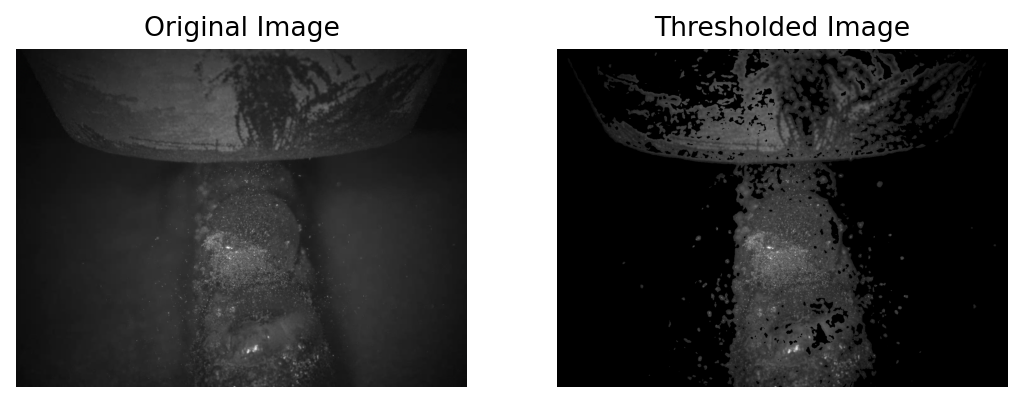

In [32]:

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,14), dpi=160)

ax1.imshow(trail)
ax1.set_title("Original Image")
ax1.axis('off')
ax2.imshow(thresholder(trail, entropy_val=7, threshold=0.5), cmap='gray')
ax2.set_title("Thresholded Image")
ax2.axis('off')

Applying Canny Edge Detector

In [33]:
trail_thresh = thresholder(trail, entropy_val=7, threshold=0.5)

/var/folders/7g/v0vfsyyx33jb34b519lc7pyr0000gn/T/ipykernel_8097/272832527.py:1: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  trail_thresh = thresholder(trail, entropy_val=7, threshold=0.5)


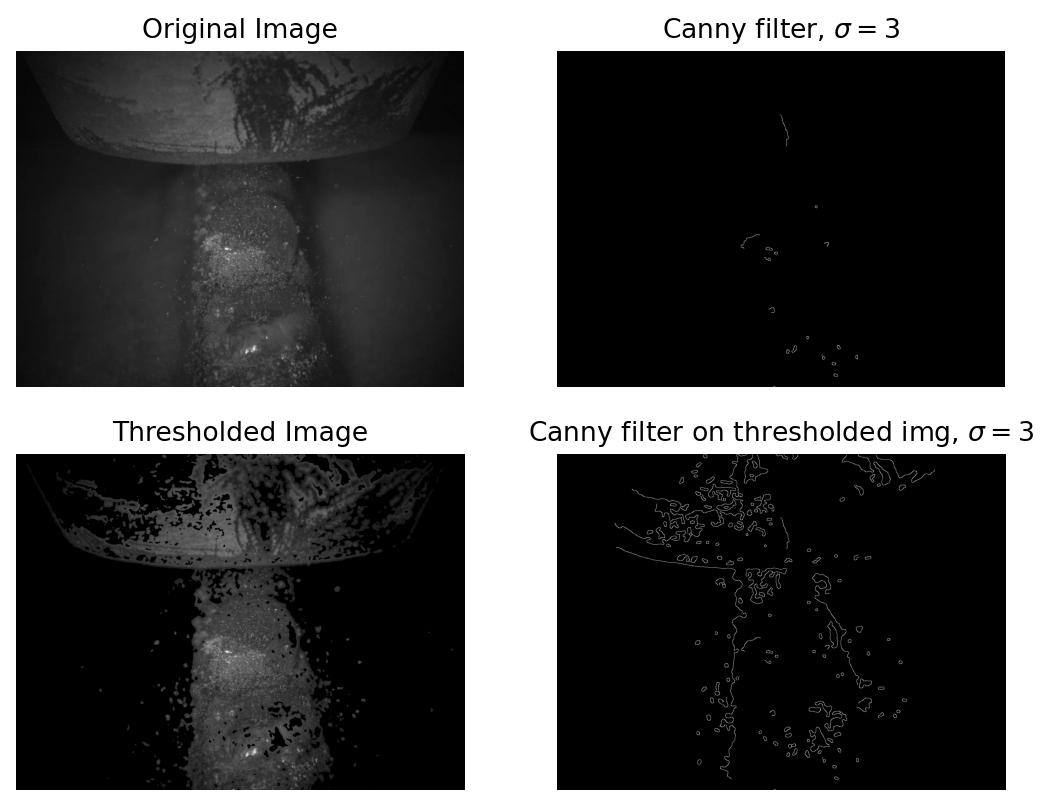

In [34]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(8,6), dpi=160)

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')

ax1.set_title('Original Image')
ax1.imshow(trail)

ax2.set_title(r'Canny filter, $\sigma=3$')
ax2.imshow(feature.canny(trail_gray, sigma=3), cmap='grey')

ax3.set_title('Thresholded Image')
ax3.imshow(trail_thresh, cmap='grey')

ax4.set_title(r'Canny filter on thresholded img, $\sigma=3$')
ax4.imshow(feature.canny(trail_thresh, sigma=3), cmap='grey')

Try applying filters to image to reject noise

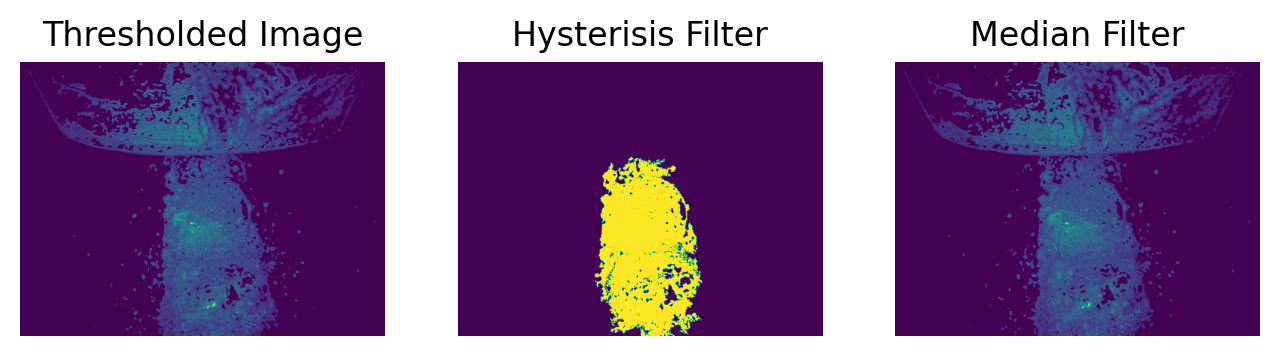

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(8,16), dpi=200)

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

ax1.set_title('Thresholded Image')
ax1.imshow(trail_thresh)

ax2.set_title('Hysterisis Filter')
ax2.imshow(filters.apply_hysteresis_threshold(trail_thresh, 0.18, 0.90))

ax3.set_title('Median Filter')
ax3.imshow(filters.median(trail_thresh))

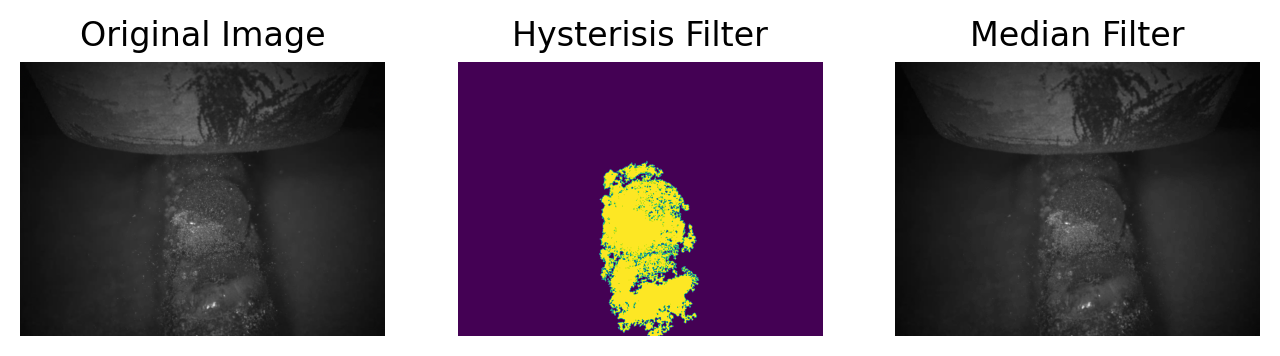

In [36]:
g, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(8,16), dpi=200)

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

ax1.set_title('Original Image')
ax1.imshow(trail)

ax2.set_title('Hysterisis Filter')
ax2.imshow(filters.apply_hysteresis_threshold(trail_gray, 0.21, 0.9))

ax3.set_title('Median Filter')
ax3.imshow(filters.median(trail_gray), cmap='gray')

## Blob Detection

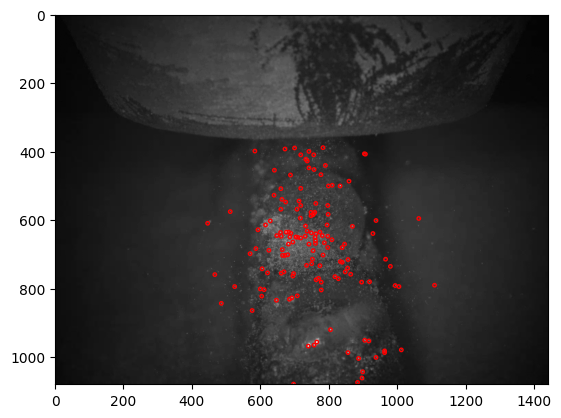

In [37]:
fig, ax = plt.subplots()
blobs_dog = feature.blob_dog(trail_gray, max_sigma=100, threshold=0.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2) 
ax.imshow(trail_gray, cmap='gray')
for blob in blobs_dog:
    y, x, r = blob
    c = plt.Circle((x, y), color='red', linewidth=1, fill=False)
    ax.add_patch(c)


Try applying median filter to thresholded image

## Similarly for Set 2

/var/folders/7g/v0vfsyyx33jb34b519lc7pyr0000gn/T/ipykernel_8097/1926087183.py:12: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  ax2.imshow(thresholder(trail2, entropy_val=7, threshold=0.5))


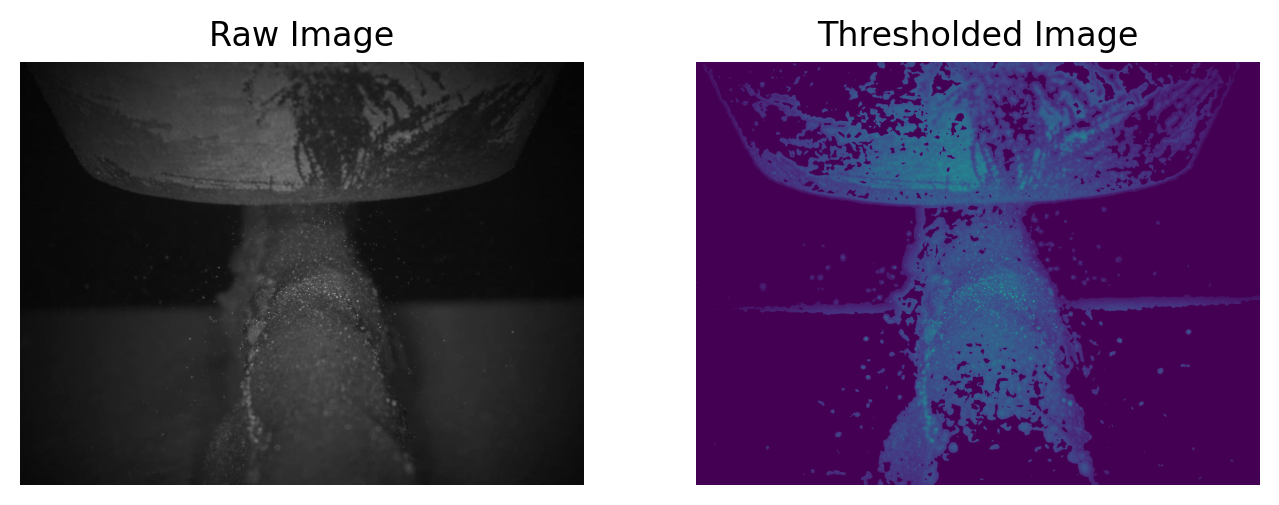

In [46]:
trail2 = imread('Images/Inputs/Set2/20240816-161944712534-0015.png')
trail2_gray = rgb2gray(imread('Images/Inputs/Set2/20240816-161944712534-0015.png'))
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,14), dpi=200)

ax1.axis('off')
ax2.axis('off')

ax1.set_title('Raw Image')
ax1.imshow(trail2)

ax2.set_title('Thresholded Image')
ax2.imshow(thresholder(trail2, entropy_val=7, threshold=0.5))

## Selecting the "Right" Part of the image

Cropping to the relevant part of the image

/var/folders/7g/v0vfsyyx33jb34b519lc7pyr0000gn/T/ipykernel_8097/2409273065.py:2: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  test_thresh = thresholder(test_cropped, entropy_val=7, threshold=0.5)


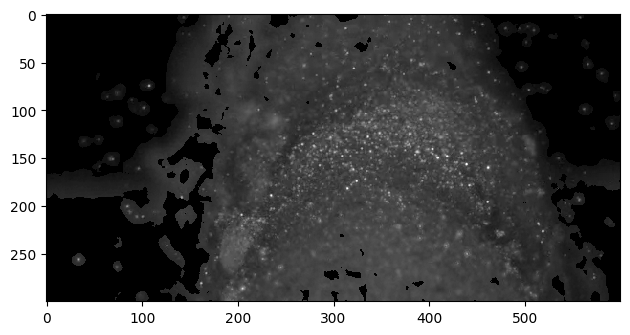

In [57]:
test_cropped = trail2[450:750, 400:1000]
test_thresh = thresholder(test_cropped, entropy_val=7, threshold=0.5)
imshow(test_thresh)

Applying Hysterisis

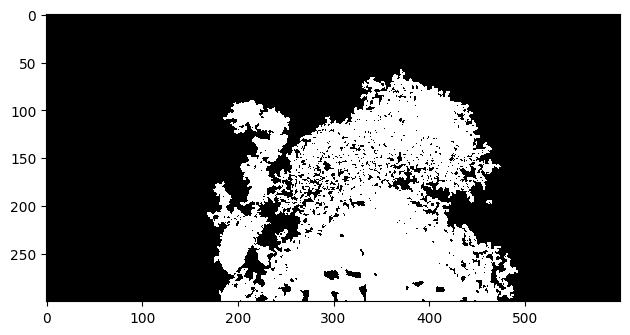

In [79]:
test_thresh_hyst = filters.apply_hysteresis_threshold(test_thresh, 0.24, 0.99)
imshow(test_thresh_hyst)

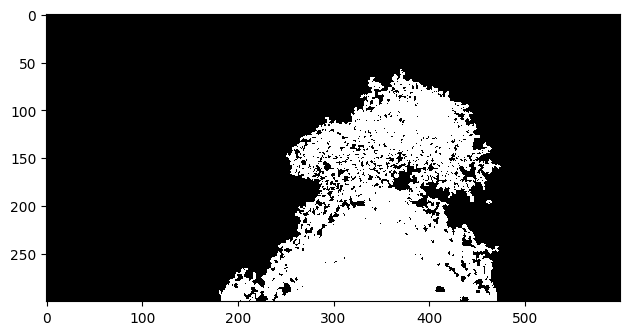

In [102]:
test_hyst = filters.apply_hysteresis_threshold(rgb2gray(test_cropped), 0.245, 0.999)
imshow(test_hyst)

This looks good for a first try! Lets try to do this for a bunch of images in Set 2

In [ ]:
import os
import glob


#path = 'Images/Inputs/Set3'
#imagePaths = [f for f in glob.glob(path + '/*.png')]  # or .jpg, .tif, etc Done to ensure only png images are taken

#for n, img in enumerate(imagePaths):
#    raw_img = imread(img)
#    grayscale_img = rgb2gray(raw_img)
#    hysterisis_image = filters.apply_hysteresis_threshold(grayscale_img, 0.245, 0.999)
#    imsave('Images/Inputs/SavesSet3/img'+str(n)+'.png', img_as_ubyte(hysterisis_image))
    


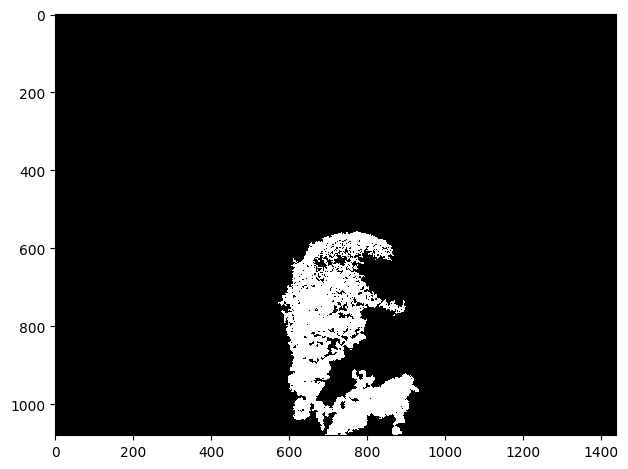

In [8]:
imshow('Images/Inputs/SavesSet3/img2.png')

^This also looks great! Finally we try to do this 

In [39]:
trail3 = imread('Images/Inputs/Set3/20240816-161944712534-0080.png')
trail3_cropped = trail3[450:700, 500:950]
trail3_hysterisis = filters.apply_hysteresis_threshold(rgb2gray(trail3_cropped), 0.268, 0.999)

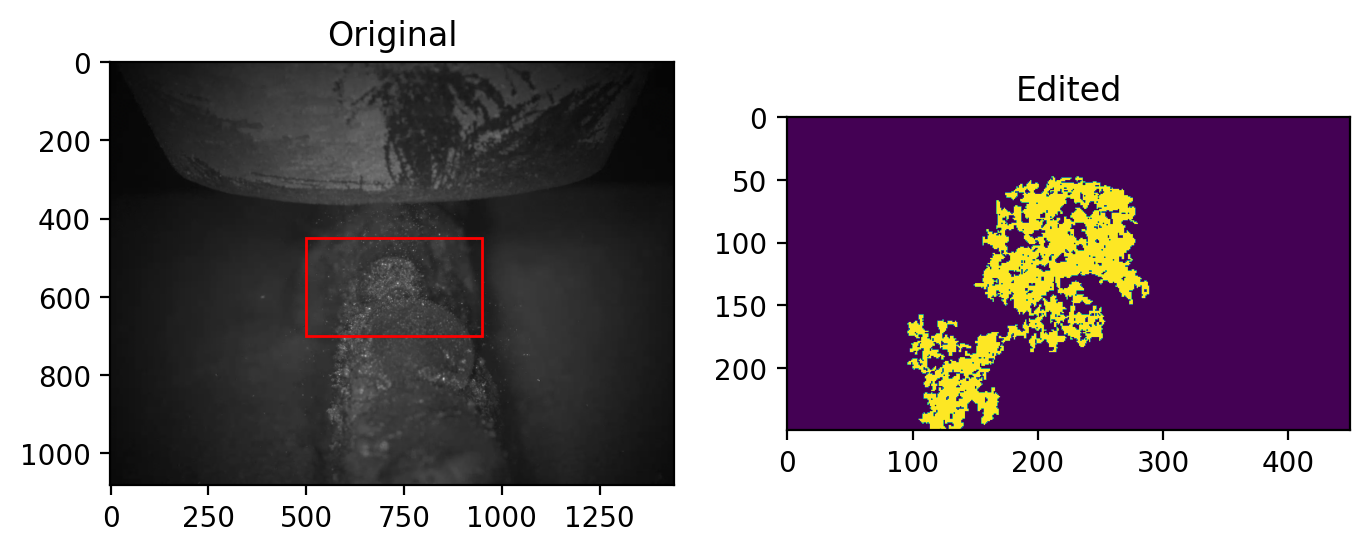

In [40]:
from matplotlib.patches import Rectangle
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,14), dpi=200)

ax1.set_title('Original')
ax1.imshow(trail3)
rect1 = Rectangle((500,450), 450, 250, color='red', fc = 'none',lw = 1)
ax1.add_patch(rect1)

ax2.set_title('Edited')
ax2.imshow(trail3_hysterisis)

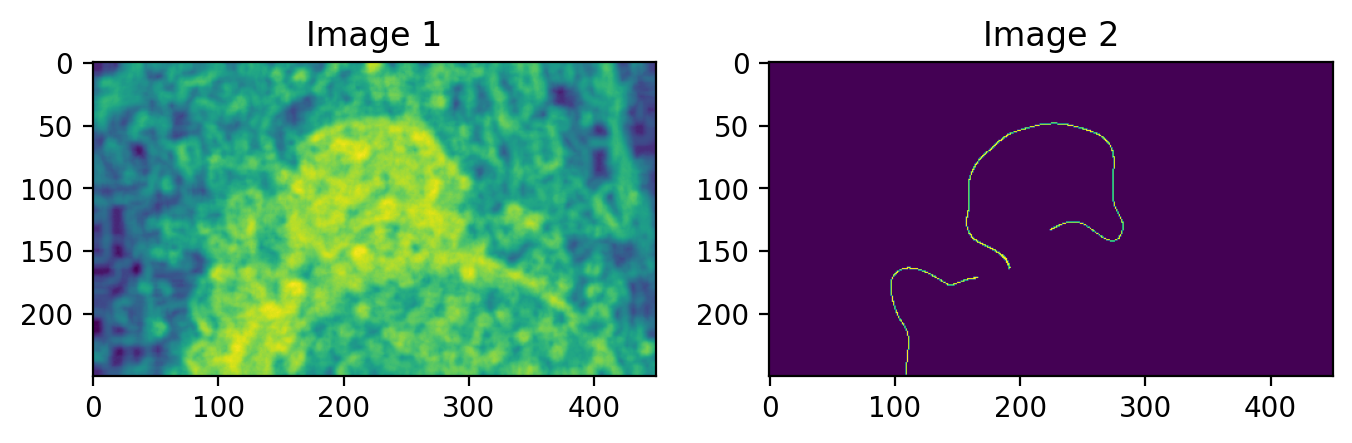

In [41]:
comparer(entropy(rgb2gray(trail3_cropped), disk(6)), feature.canny(trail3_hysterisis, sigma=12))

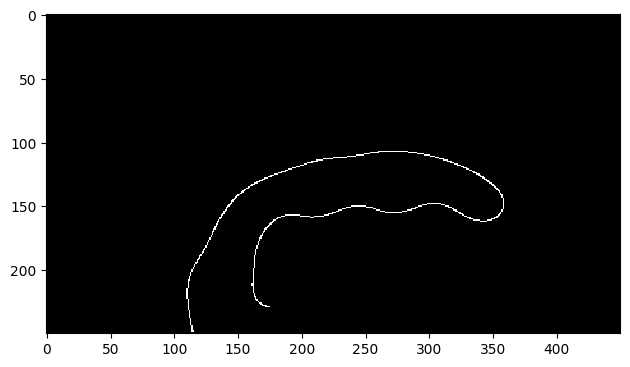

In [26]:
imshow(feature.canny(trail3_hysterisis, sigma=12))

In [76]:
import os
import glob


path = 'Images/Inputs/Set3'
imagePaths = [f for f in glob.glob(path + '/*.png')]  # or .jpg, .tif, etc Done to ensure only png images are taken

for n, img in enumerate(imagePaths):
    raw_img = imread(img)
    cropped_img = raw_img[450:700, 500:950]
    hysterisis_image = filters.apply_hysteresis_threshold(rgb2gray(cropped_img), 0.238, 0.9)
    CED_img = feature.canny(hysterisis_image, sigma=11)
    imsave('Images/Outputs/Set3CED/img'+str(n)+'.png', img_as_ubyte(CED_img))

/var/folders/7g/v0vfsyyx33jb34b519lc7pyr0000gn/T/ipykernel_11283/2437224225.py:13: UserWarning: Images/Outputs/Set3CED/img0.png is a low contrast image
  imsave('Images/Outputs/Set3CED/img'+str(n)+'.png', img_as_ubyte(CED_img))
/var/folders/7g/v0vfsyyx33jb34b519lc7pyr0000gn/T/ipykernel_11283/2437224225.py:13: UserWarning: Images/Outputs/Set3CED/img2.png is a low contrast image
  imsave('Images/Outputs/Set3CED/img'+str(n)+'.png', img_as_ubyte(CED_img))
/var/folders/7g/v0vfsyyx33jb34b519lc7pyr0000gn/T/ipykernel_11283/2437224225.py:13: UserWarning: Images/Outputs/Set3CED/img3.png is a low contrast image
  imsave('Images/Outputs/Set3CED/img'+str(n)+'.png', img_as_ubyte(CED_img))
/var/folders/7g/v0vfsyyx33jb34b519lc7pyr0000gn/T/ipykernel_11283/2437224225.py:13: UserWarning: Images/Outputs/Set3CED/img4.png is a low contrast image
  imsave('Images/Outputs/Set3CED/img'+str(n)+'.png', img_as_ubyte(CED_img))
/var/folders/7g/v0vfsyyx33jb34b519lc7pyr0000gn/T/ipykernel_11283/2437224225.py:13: UserW